In [2]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos de Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

# Pré-processamento e métricas
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Ignorar warnings desnecessários
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv('D:\\Users\\Admin\Desktop\\Dados-SciteJR-Treinamento\\projeto 1\\netflix_clean.csv')
df.head()

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Year,...,Uruguay,Vatican City,Venezuela,Vietnam,West Germany,Zimbabwe,Duration_Num,Duration_Minutes,Duration_Seasons,duration_minutes
0,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020.0,...,False,False,False,False,False,False,4.0,NaN,4.0,NaN
1,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",2016.0,...,False,False,False,False,False,False,93.0,93.0,NaN,93.0
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies",2018.0,...,False,False,False,False,False,False,78.0,78.0,NaN,78.0
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",2017.0,...,False,False,False,False,False,False,80.0,80.0,NaN,80.0
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,2020.0,...,False,False,False,False,False,False,123.0,123.0,NaN,123.0


In [4]:
cleaned_columns = []
seen_normalized_names = set()

# Itere sobre as colunas atuais do DataFrame
for col in df.columns:
    # Crie uma versão "normalizada" do nome da coluna (sem vírgulas, tudo em minúsculas)
    normalized_name = col.replace(',', '').strip().lower()

    # Se a versão normalizada do nome ainda não foi vista, adicione a coluna à nova lista
    if normalized_name not in seen_normalized_names:
        cleaned_columns.append(col)
        seen_normalized_names.add(normalized_name)

# Reatribua as colunas limpas ao seu DataFrame
df = df[cleaned_columns]

# Verifique as novas colunas para confirmar a limpeza
print("O DataFrame foi limpo com sucesso! As novas colunas são:")
print(df.columns)

O DataFrame foi limpo com sucesso! As novas colunas são:
Index(['Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date',
       'Rating', 'Duration', 'Type', 'Year',
       ...
       'United States', 'Uruguay', 'Vatican City', 'Venezuela', 'Vietnam',
       'West Germany', 'Zimbabwe', 'Duration_Num', 'Duration_Minutes',
       'Duration_Seasons'],
      dtype='object', length=172)


In [5]:
list(df.columns)




['Category',
 'Title',
 'Director',
 'Cast',
 'Country',
 'Release_Date',
 'Rating',
 'Duration',
 'Type',
 'Year',
 'Action & Adventure',
 'Anime Features',
 'Anime Series',
 'British TV Shows',
 'Children & Family Movies',
 'Classic & Cult TV',
 'Classic Movies',
 'Comedies',
 'Crime TV Shows',
 'Cult Movies',
 'Documentaries',
 'Docuseries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'International TV Shows',
 "Kids' TV",
 'Korean TV Shows',
 'LGBTQ Movies',
 'Movies',
 'Music & Musicals',
 'Reality TV',
 'Romantic Movies',
 'Romantic TV Shows',
 'Sci-Fi & Fantasy',
 'Science & Nature TV',
 'Spanish-Language TV Shows',
 'Sports Movies',
 'Stand-Up Comedy',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'TV Sci-Fi & Fantasy',
 'TV Shows',
 'TV Thrillers',
 'Teen TV Shows',
 'Thrillers',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 

In [6]:
num_linhas_shape = df.shape[0]

# Método 2: Usando a função len()
num_linhas_len = len(df)

# Imprima os resultados
print(f"O número de linhas na planilha usando .shape é: {num_linhas_shape}")
print(f"O número de linhas na planilha usando len() é: {num_linhas_len}")

O número de linhas na planilha usando .shape é: 7789
O número de linhas na planilha usando len() é: 7789


In [7]:

import pandas as pd

# Identificar as colunas de gêneros e países
# Estas listas contêm os nomes exatos das suas colunas one-hot-encoded
generos_cols = ['Action & Adventure', 'Anime Features', 'Anime Series', 'British TV Shows', 'Children & Family Movies', 'Classic & Cult TV', 'Classic Movies', 'Comedies', 'Crime TV Shows', 'Cult Movies', 'Documentaries', 'Docuseries', 'Dramas', 'Faith & Spirituality', 'Horror Movies', 'Independent Movies', 'International Movies', 'International TV Shows', "Kids' TV", 'Korean TV Shows', 'LGBTQ Movies', 'Movies', 'Music & Musicals', 'Reality TV', 'Romantic Movies', 'Romantic TV Shows', 'Sci-Fi & Fantasy', 'Science & Nature TV', 'Spanish-Language TV Shows', 'Sports Movies', 'Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows', 'TV Action & Adventure', 'TV Comedies', 'TV Dramas', 'TV Horror', 'TV Mysteries', 'TV Sci-Fi & Fantasy', 'TV Shows', 'TV Thrillers', 'Teen TV Shows', 'Thrillers']
paises_cols = ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Bermuda', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands', 'Chile', 'China', 'Colombia', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'East Germany', 'Ecuador', 'Egypt', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Latvia', 'Lebanon', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malawi', 'Malaysia', 'Malta', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 'Norway', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Senegal', 'Serbia', 'Singapore', 'Slovakia', 'Slovenia', 'Somalia', 'South Africa', 'South Korea', 'Soviet Union', 'Spain', 'Sri Lanka', 'Sudan', 'Sweden', 'Switzerland', 'Syria', 'Taiwan', 'Thailand', 'Turkey', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'Vatican City', 'Venezuela', 'Vietnam', 'West Germany', 'Zimbabwe']

# Derreter (melt) as colunas de gêneros
df_generos_long = df.melt(id_vars=['Year'] + paises_cols, value_vars=generos_cols, var_name='genero', value_name='tem_genero')
df_generos_long = df_generos_long[df_generos_long['tem_genero'] == 1].drop('tem_genero', axis=1)

# Derreter (melt) as colunas de países
df_poisson = df_generos_long.melt(id_vars=['Year', 'genero'], value_vars=paises_cols, var_name='pais', value_name='tem_pais')
df_poisson = df_poisson[df_poisson['tem_pais'] == 1].drop('tem_pais', axis=1)

# Agrupar por ano, país e gênero para obter a contagem de títulos
df_poisson = df_poisson.groupby(['Year', 'pais', 'genero']).size().reset_index(name='num_titulos')

print("A base de dados 'df_poisson' foi criada com sucesso.")
print(df_poisson.head())



A base de dados 'df_poisson' foi criada com sucesso.
     Year           pais                        genero  num_titulos
0  2008.0  United States                        Dramas            1
1  2008.0  United States            Independent Movies            1
2  2008.0  United States  Stand-Up Comedy & Talk Shows            1
3  2008.0  United States                     Thrillers            1
4  2009.0        Denmark                        Dramas            1


In [8]:
df_poisson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3478 entries, 0 to 3477
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         3478 non-null   float64
 1   pais         3478 non-null   object 
 2   genero       3478 non-null   object 
 3   num_titulos  3478 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 108.8+ KB


In [9]:
import pandas as pd

# Suponha que seu DataFrame df_poisson já foi carregado.

# Etapa 1: Preparar suas variáveis X e y
# Selecionar as colunas categóricas para X
X = df_poisson[['pais', 'genero']]
y = df_poisson['num_titulos'] # A variável 'y' já é numérica

# Etapa 2: Converter as variáveis categóricas (X) para numéricas
X = pd.get_dummies(X, columns=['pais', 'genero'], drop_first=True)

# Etapa 3: Forçar a conversão de todas as colunas de X para um tipo numérico
# Isso resolve o problema do dtype='object' de forma definitiva.
X = X.astype(float)

print("A conversão foi realizada. Verifique os tipos de dados das novas colunas:")
print(X.dtypes)

A conversão foi realizada. Verifique os tipos de dados das novas colunas:
pais_Albania                  float64
pais_Algeria                  float64
pais_Angola                   float64
pais_Argentina                float64
pais_Armenia                  float64
                               ...   
genero_TV Sci-Fi & Fantasy    float64
genero_TV Shows               float64
genero_TV Thrillers           float64
genero_Teen TV Shows          float64
genero_Thrillers              float64
Length: 157, dtype: object


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Etapa 1: Definir as variáveis X (independentes) e y (dependente)
X = df_poisson[['Year', 'pais', 'genero']]
y = df_poisson['num_titulos']

# Etapa 2: Converter as variáveis categóricas (pais e genero) para numéricas
X = pd.get_dummies(X, columns=['pais', 'genero'], drop_first=True)

# Etapa 3: Garantir que todas as colunas de X e y são numéricas
# Esta é a etapa crucial para corrigir o erro.
X = X.astype(float)
y = y.astype(float)

# Etapa 4: Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Etapa 5: Treinar o modelo de Regressão de Poisson
X_train_const = sm.add_constant(X_train)
poisson_model = sm.GLM(y_train, X_train_const, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

# Exibir os resultados do modelo
print("Modelo treinado com sucesso!")
print(poisson_results.summary())

Modelo treinado com sucesso!
                 Generalized Linear Model Regression Results                  
Dep. Variable:            num_titulos   No. Observations:                 2782
Model:                            GLM   Df Residuals:                     2626
Model Family:                 Poisson   Df Model:                          155
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10810.
Date:                Mon, 01 Sep 2025   Deviance:                       13799.
Time:                        09:55:06   Pearson chi2:                 1.59e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9997
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

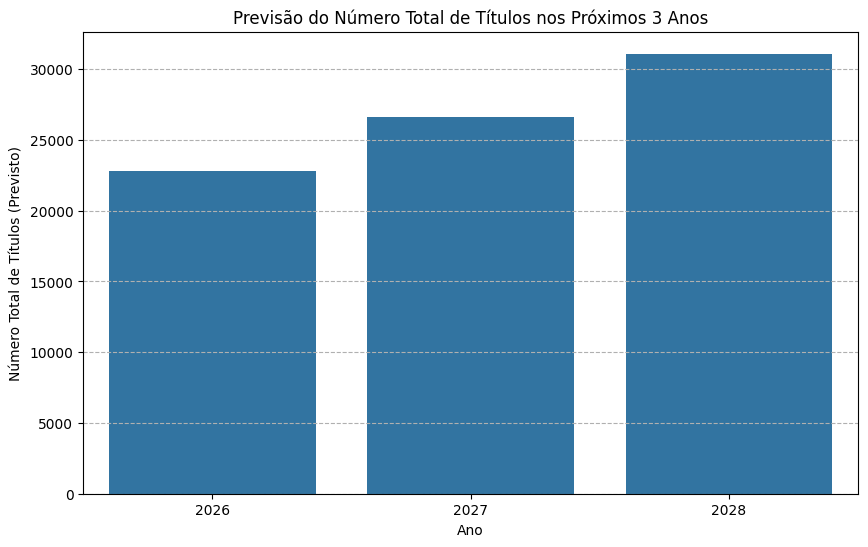


Total de títulos previstos por ano:
   Year  previsoes_num_titulos
0  2026           22799.043584
1  2027           26622.208790
2  2028           31086.479494


In [11]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# --- Supondo que as variáveis `df_poisson` e `poisson_results` já estão disponíveis. ---
# Vamos usar o `X` que foi usado para treinar o modelo para garantir a consistência das colunas.
# Se você não tiver o X do treino, pode recriá-lo:
# X = pd.get_dummies(df_poisson[['Year', 'pais', 'genero']], columns=['pais', 'genero'], drop_first=True)

# Definir os anos para os quais você deseja prever
future_years = [2026, 2027, 2028]

# Pegar as listas únicas de países e gêneros do seu DataFrame
unique_paises = df_poisson['pais'].unique()
unique_generos = df_poisson['genero'].unique()

# Criar um DataFrame com todas as combinações de país, gênero e ano futuro
future_data_list = list(product(unique_paises, unique_generos, future_years))
future_data = pd.DataFrame(future_data_list, columns=['pais', 'genero', 'Year'])

# Preparar os dados de previsão (one-hot encoding e conversão para float)
X_predict = pd.get_dummies(future_data, columns=['pais', 'genero'], drop_first=True)
X_predict = X_predict.astype(float)

# Adicionar a constante ao DataFrame de previsão
X_predict_const = sm.add_constant(X_predict, has_constant='add')

# Fazer as previsões
predictions = poisson_results.predict(X_predict_const)
prediction_df = future_data.copy()
prediction_df['previsoes_num_titulos'] = predictions

# Agrupar os dados por ano para somar o total de títulos previstos
predictions_by_year = prediction_df.groupby('Year')['previsoes_num_titulos'].sum().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='previsoes_num_titulos', data=predictions_by_year)
plt.title('Previsão do Número Total de Títulos nos Próximos 3 Anos')
plt.xlabel('Ano')
plt.ylabel('Número Total de Títulos (Previsto)')
plt.grid(axis='y', linestyle='--')
plt.show()

print("\nTotal de títulos previstos por ano:")
print(predictions_by_year)

fazer alguns graficos que dividam a previsão de cada genero nos proximos 3 anos por pais

In [12]:
import pandas as pd

# Supondo que o DataFrame `prediction_df` já foi criado com as previsões

# Agrupar as previsões por ano e país e somar o número de títulos
previsoes_por_pais = prediction_df.groupby(['Year', 'pais'])['previsoes_num_titulos'].sum().reset_index()

# Opcional: Renomear as colunas para o formato que você pediu
previsoes_por_pais.rename(columns={
    'Year': 'ano',
    'previsoes_num_titulos': 'numero de titulos'
}, inplace=True)

# Exibir as primeiras linhas da nova base de dados
print("Nova base de dados de previsões por país e ano:")
print(previsoes_por_pais.head())

Nova base de dados de previsões por país e ano:
    ano         pais  numero de titulos
0  2026  Afghanistan          58.394699
1  2026      Albania          36.592042
2  2026      Algeria          66.893835
3  2026       Angola          37.915204
4  2026    Argentina         260.660270


In [13]:
# O DataFrame `previsoes_por_pais` já deve estar pronto da etapa anterior.

# Exporte para um arquivo CSV
previsoes_por_pais.to_csv('previsoes_por_pais.csv', index=False)

In [14]:
# O DataFrame `previsoes_por_pais` já deve estar pronto.

# Exporte para um arquivo Parquet
previsoes_por_pais.to_parquet('previsoes_por_pais.parquet', index=False)
